# 决策树-ID3

In [1]:
from math import log

## 计算信息熵

In [2]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): 
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [3]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
                   [1, 1, 'yes'],
                   [1, 0, 'no'],
                   [0, 1, 'no'],
                   [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [4]:
myDat, labels = createDataSet()

In [5]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [6]:
calcShannonEnt(myDat)

0.9709505944546686

In [7]:
myDat[0][-1] = 'maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [8]:
calcShannonEnt(myDat)

1.3709505944546687

## 划分数据集

### 按给定特征划分数据集

In [9]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] 
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [10]:
a = [1, 2, 3]
b = [4, 5, 6]

In [11]:
a.append(b)
a

[1, 2, 3, [4, 5, 6]]

In [12]:
a = [1, 2, 3]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [13]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [14]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [15]:
splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

### 选择最好的数据集划分方式

In [16]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1     
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):        
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)       
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     
        if infoGain > bestInfoGain:       
            bestInfoGain = infoGain         
            bestFeature = i
    return bestFeature                      

In [17]:
myDat, labels = createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [18]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

## 递归构建决策树

In [19]:
import operator

In [20]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): 
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

### 创建树

In [21]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]
    if len(dataSet[0]) == 1: 
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]   
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree                

In [22]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 使用matplotlib注解绘制树形图

In [23]:
import matplotlib.pyplot as plt

### 使用文本注解绘制树节点

In [24]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

In [25]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

In [26]:
def createPlot():
   fig = plt.figure(1, facecolor='white')
   fig.clf()
   createPlot.ax1 = plt.subplot(111, frameon=False) 
   plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
   plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
   plt.show()

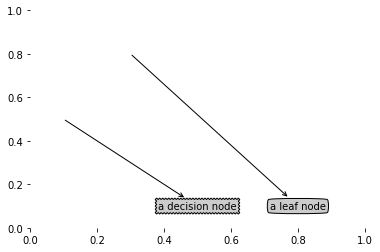

In [27]:
createPlot()

### 获取叶节点的数目和树的层数

In [28]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

In [29]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [30]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [31]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [32]:
myTree = retrieveTree(0)

In [33]:
getNumLeafs(myTree)

3

In [34]:
getTreeDepth(myTree)

2

### 绘制树形图

In [35]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [36]:
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key], cntrPt, str(key))       
        else: 
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

In [37]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  
#     createPlot.ax1 = plt.subplot(111, frameon=False) 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

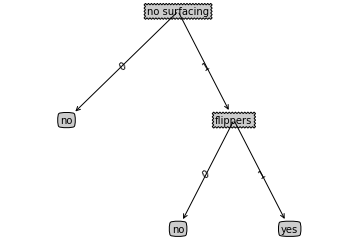

In [38]:
myTree = retrieveTree(0)
createPlot(myTree)

In [39]:
myTree['no surfacing'][3] = 'maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

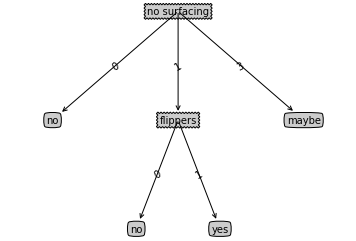

In [40]:
createPlot(myTree)

## 使用决策树执行分类

### 决策树分类函数

In [41]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: 
        classLabel = valueOfFeat
    return classLabel

In [42]:
myDat, labels = createDataSet()
labels

['no surfacing', 'flippers']

In [43]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [44]:
classify(myTree, labels, [1, 0])

'no'

In [45]:
classify(myTree, labels, [1, 1])

'yes'

### 使用pickle模块存储决策树

In [46]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb+')
    pickle.dump(inputTree, fw, True)
    fw.close()

In [47]:
def grabTree(filename):
    import pickle
    fr = open(filename, 'rb+')
    return pickle.load(fr)

In [48]:
storeTree(myTree, 'classifierStorage')

In [49]:
grabTree('classifierStorage')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 使用决策树预测隐形眼镜类型

In [50]:
import pandas as pd

In [51]:
df = pd.read_table('lenses.txt',  sep='\t', header=None)
df.head()

,0,1,2,3,4
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses


In [52]:
df.shape

(24, 5)

In [53]:
lenses = [list(df.iloc[i]) for i in range(df.shape[0])]
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [54]:
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [55]:
lensesTree = createTree(lenses, lensesLabels)
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'young': 'soft',
      'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}}},
    'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'pre': 'no lenses',
        'young': 'hard',
        'presbyopic': 'no lenses'}}}}}},
  'reduced': 'no lenses'}}

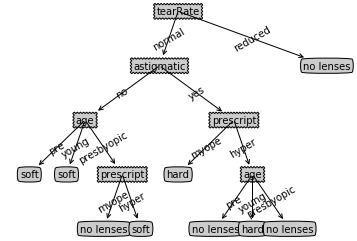

In [56]:
createPlot(lensesTree)